In [58]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from api_keys import weather_api_key

In [127]:
state_data = pd.read_csv("CSV_Data/us-states.csv")
state_data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [126]:
remove_guam = state_data.loc[state_data["state"] != "Guam", ]
remove_vi = remove_guam.loc[remove_guam["state"] != "Virgin Islands", ]
remove_nmi = remove_vi.loc[remove_vi["state"] != "Northern Mariana Islands", ]
clean_state_df = remove_nmi.loc[remove_nmi["state"] != "Puerto Rico", ]
#clean_state_df.head()

In [30]:
grouped_state_data = clean_state_df.groupby(['state', 'deaths'])

In [130]:
grouped_state_data = clean_state_df.groupby(['state'])

sum_deaths = grouped_state_data['deaths'].sum()

sum_deaths_df = pd.DataFrame(sum_deaths)
sum_deaths_df.head()

,deaths
state,
Alabama,1599680
Alaska,45987
Arizona,2817615
Arkansas,899064
California,8919335


In [32]:
sum_deaths_df['deaths'].count()

51

In [128]:
max_deaths = sum_deaths_df['deaths'].max()
min_deaths = sum_deaths_df['deaths'].min()

max_min_df = sum_deaths_df.loc[(sum_deaths_df["deaths"] == 13823752) | 
                               (sum_deaths_df["deaths"] == 40301), :]
max_min_df

,deaths
state,
New York,13823752
Vermont,40301


In [138]:
death_by_date_df = clean_state_df[["date", "state", "deaths"]]
death_by_date_df.head()

,date,state,deaths
0,2020-01-21,Washington,0
1,2020-01-22,Washington,0
2,2020-01-23,Washington,0
3,2020-01-24,Illinois,0
4,2020-01-24,Washington,0


In [139]:
ny_df = death_by_date_df.loc[death_by_date_df["state"] == "New York", ]
ny_df = ny_df.reset_index(drop=True)
#ny_df

In [140]:
vt_df = death_by_date_df.loc[death_by_date_df["state"] == "Vermont", ]
vt_df = vt_df.reset_index(drop=True)
#vt_df

In [148]:
ny_vt_df = pd.merge(ny_df, vt_df, on="date")
ny_vt_df = ny_vt_df.rename(columns={"state_x": "State - Max Death",
                                    "deaths_x": "New York Deaths",
                                    "date": "Date",
                                    "state_y": "State - Min Death",
                                    "deaths_y": "Vermont Deaths"
                                                })
ny_vt_df

,Date,State - Max Death,New York Deaths,State - Min Death,Vermont Deaths
0,2020-03-07,New York,0,Vermont,0
1,2020-03-08,New York,0,Vermont,0
2,2020-03-09,New York,0,Vermont,0
3,2020-03-10,New York,0,Vermont,0
4,2020-03-11,New York,0,Vermont,0
...,...,...,...,...,...
414,2021-04-25,New York,51471,Vermont,244
415,2021-04-26,New York,51511,Vermont,244
416,2021-04-27,New York,51587,Vermont,245
417,2021-04-28,New York,51608,Vermont,246


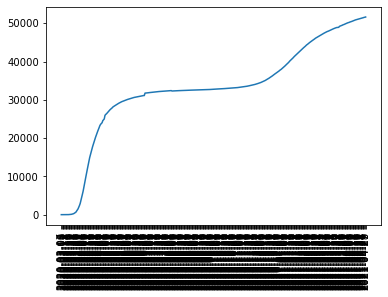

In [149]:
date = []
ny_deaths = []
date = ny_vt_df['Date'].tolist()
ny_deaths = ny_vt_df['New York Deaths'].tolist()

#plt.figure(figsize=(20,6))
plt.plot(date, ny_deaths)
plt.xticks(rotation = 90)
plt.show()

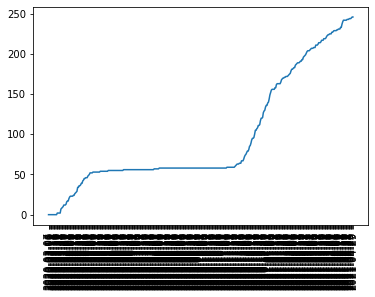

In [150]:
date = []
ny_deaths = []
date = ny_vt_df['Date'].tolist()
vt_deaths = ny_vt_df['Vermont Deaths'].tolist()

#plt.figure(figsize=(20,6))
plt.plot(date, vt_deaths)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
states = []
states = death_by_date_df['state'].tolist()

dates = []
dates = death_by_date_df['date'].tolist()

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url=f'{url}appid={weather_api_key}&units={units}&q='

In [ ]:
state_name = []
max_temp = []
date = []
humidity = []

count=1

for state in states:
        response=requests.get(query_url + state).json()
        
        try:
            state_name.append(response['name'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])  
            date.append(response['dt'])     
    
        except KeyError:
            
            print(state + ' State not found. Skipping...') 
            
        count=count+1

In [ ]:
dataframe1 = {
    "State": State_name,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Date": date
}
dataframe1 = pd.DataFrame(dataframe1)
dataframe1.head(10)